In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error


import datetime

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"

In [3]:
data = pd.read_csv(url)
data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [4]:
"""
*Which is the tensor of the time serie?
*Which is the trend?
*Is it stationary?
*Is there variability or noise?
*Note: A tensor in a time serie is the minimum unit of time for which there is data. It can be every second, minute, hour, day, week, month...

*Step 3: Train an ARIMA
Use the training data to find the best parameterization of your ARIMA model.

*Step 4: Predict with the test set
Now use the trained model with the test set and compare the points with the real ones. Measure the performance of the time serie.

*Step 5: Save the model
Store the model in the corresponding folder.
"""

'\n*Which is the tensor of the time serie?\n*Which is the trend?\n*Is it stationary?\n*Is there variability or noise?\n*Note: A tensor in a time serie is the minimum unit of time for which there is data. It can be every second, minute, hour, day, week, month...\n\n*Step 3: Train an ARIMA\nUse the training data to find the best parameterization of your ARIMA model.\n\n*Step 4: Predict with the test set\nNow use the trained model with the test set and compare the points with the real ones. Measure the performance of the time serie.\n\n*Step 5: Save the model\nStore the model in the corresponding folder.\n'

In [5]:
data["date"] = pd.to_datetime(data["date"])

data.tail()

,date,sales
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214
365,2023-09-03 17:10:08.079328,1000.482785


([<matplotlib.axis.XTick at 0x7b25c307e0e0>,
 [Text(0, 0, '2022-09-03 17:10:08.079328'),
  Text(100, 0, '2022-12-12 17:10:08.079328'),
  Text(200, 0, '2023-03-22 17:10:08.079328'),
  Text(300, 0, '2023-06-30 17:10:08.079328')])

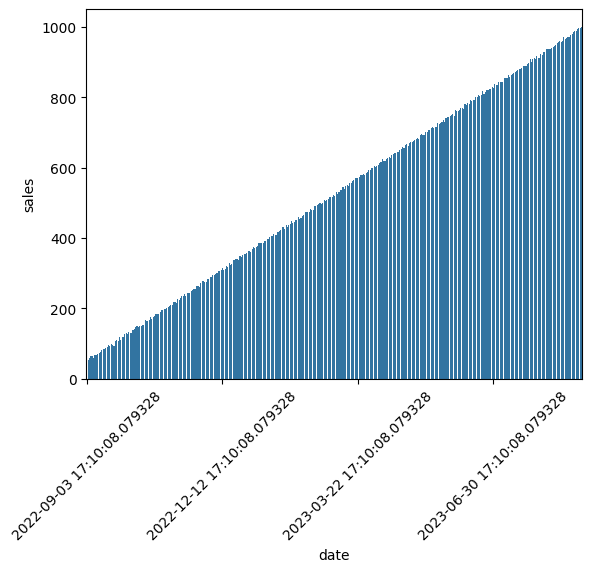

In [6]:
sns.barplot(data=data,x = data["date"], y = data["sales"])
plt.xticks(np.arange(0, len(data['date']), step=100), rotation=45)

In [7]:
print(data.date.min())
print(data.date.max())

2022-09-03 17:10:08.079328
2023-09-03 17:10:08.079328


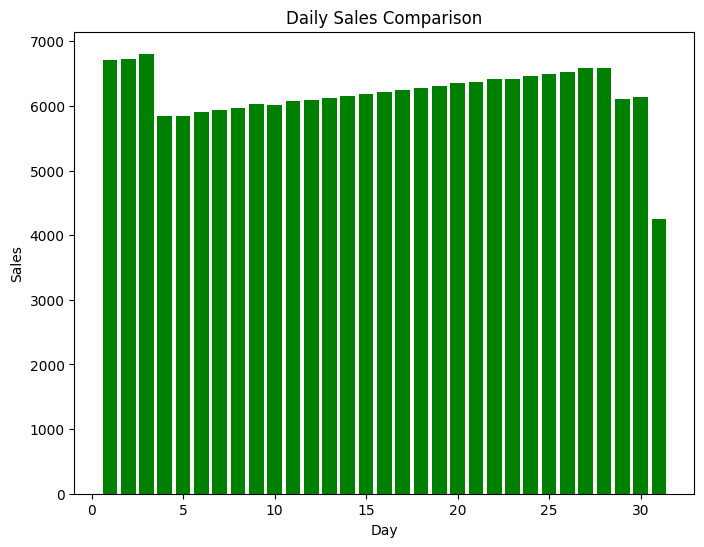

In [8]:
data['Day'] = data.date.dt.day

daily_sales = data.groupby('Day')['sales'].sum()

plt.figure(figsize=(8, 6))
plt.bar(daily_sales.index, daily_sales.values, color="green")
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Daily Sales Comparison')
plt.show()

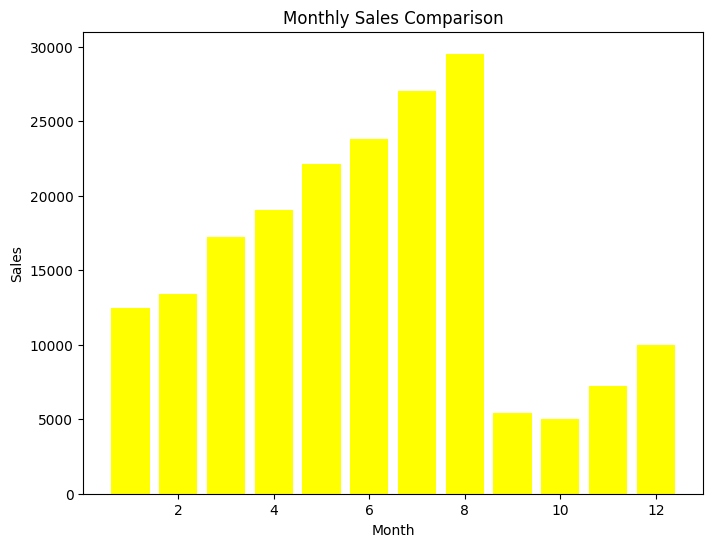

In [9]:
data['Month'] = data.date.dt.month

daily_sales = data.groupby('Month')['sales'].sum()

plt.figure(figsize=(8, 6))
plt.bar(daily_sales.index, daily_sales.values, color="yellow")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Comparison')
plt.show()

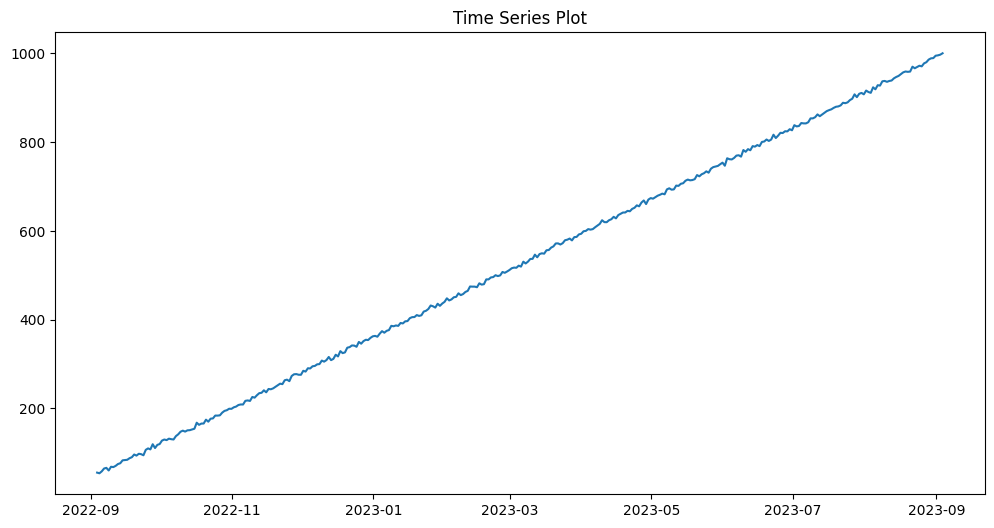

In [10]:
data = data.set_index("date")

plt.figure(figsize=(12, 6))
plt.plot(data["sales"])
plt.title('Time Series Plot')
plt.show()

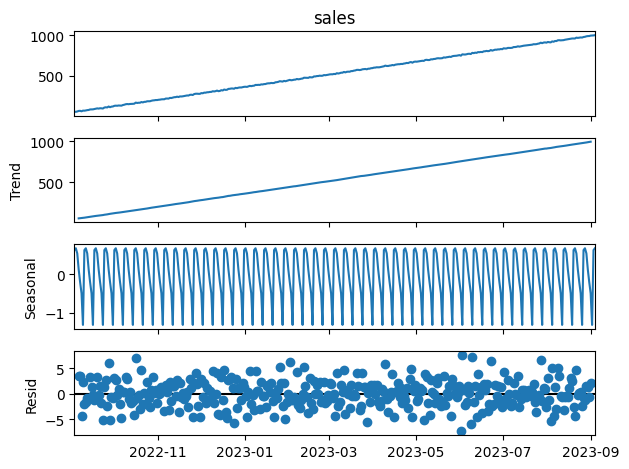

In [11]:
decomposition = seasonal_decompose(data["sales"], model="additive")
decomposition.plot()
plt.show()

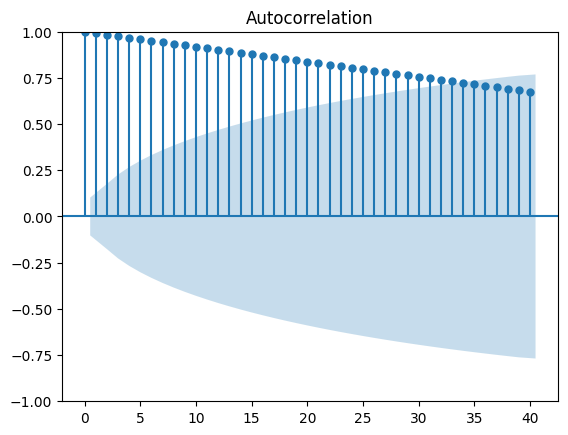

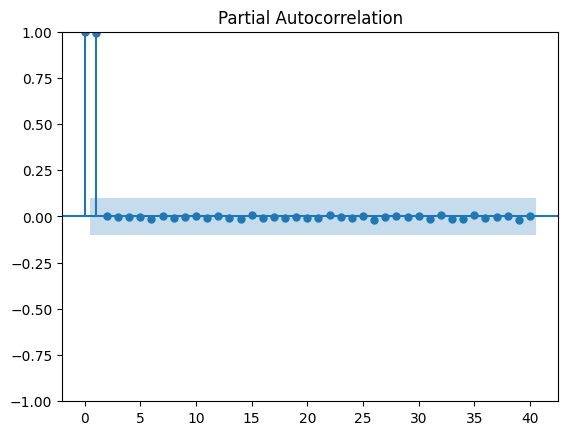

In [12]:
plot_acf(data["sales"], lags=40)
plt.show()
plot_pacf(data["sales"], lags=40)
plt.show()

In [13]:
#The dataset doesn't seem to have any seasonality

In [22]:
model = ARIMA(data["sales"][:-70], order=(2, 1, 1))
model_fit = model.fit()

/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-i

In [23]:
forecast = model_fit.forecast(steps=70)

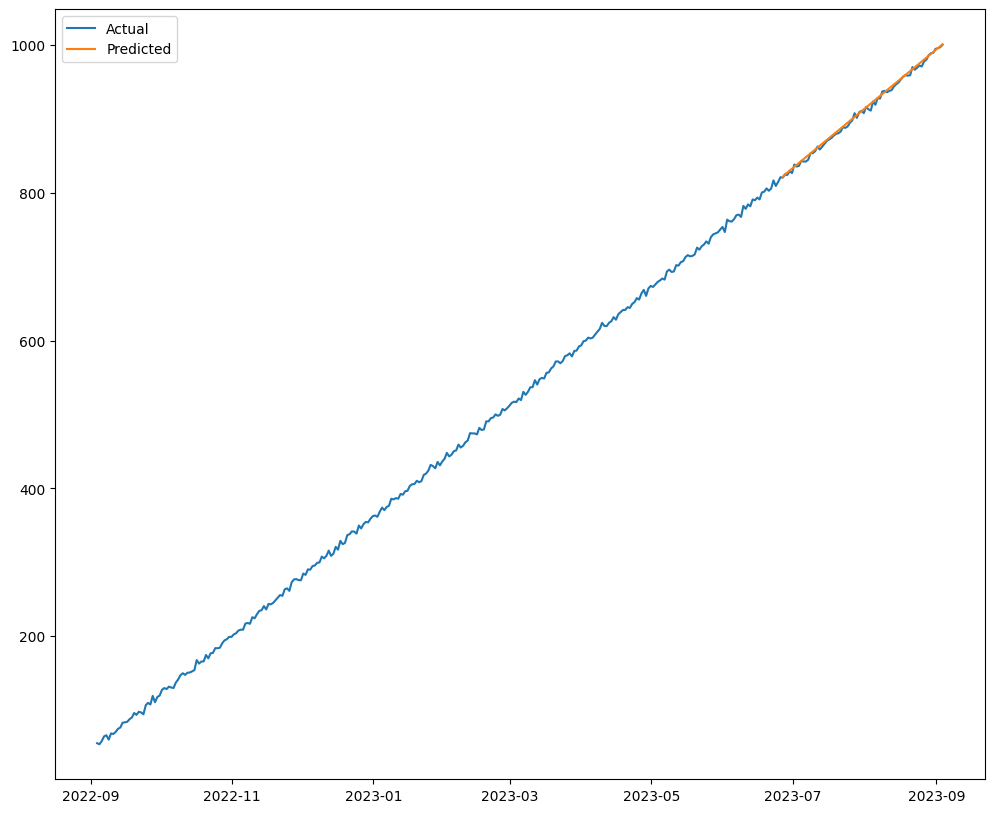

In [39]:
plt.figure(figsize = (12,10))
plt.plot(data["sales"],label='Actual')
plt.plot(forecast, label='Predicted')
plt.legend()


In [25]:
predictions = model_fit.forecast(steps=len(data["sales"][:-70]))

In [35]:
mse = mean_squared_error(data["sales"][:-70], predictions)
mae = mean_absolute_error(data["sales"][:-70], predictions)

In [31]:
print("MSE:", mse)
print("MAE:", mae)

MSE: 593565.803564997
MAE: 770.4257529310718
